In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
plt.rcParams['font.family'] = ['Arial Unicode MS']#
plt.rcParams['axes.unicode_minus']=False

# data cleaning

## introduce the data

In [160]:
data = pd.read_table('userlostprob.txt')
data.head()

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0,24636,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.04,NaN,...,615.0,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12
1,1,24637,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.06,NaN,...,513.0,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14
2,0,24641,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.05,NaN,...,382.0,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19
3,0,24642,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.01,NaN,...,203.0,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16
4,1,24644,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.00,NaN,...,84.0,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21


## data exploration

In [116]:
data.shape

(689945, 51)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689945 entries, 0 to 689944
Data columns (total 51 columns):
label                               689945 non-null int64
sampleid                            689945 non-null int64
d                                   689945 non-null object
arrival                             689945 non-null object
iforderpv_24h                       689945 non-null int64
decisionhabit_user                  385450 non-null float64
historyvisit_7ordernum              82915 non-null float64
historyvisit_totalordernum          386525 non-null float64
hotelcr                             689148 non-null float64
ordercanceledprecent                447831 non-null float64
landhalfhours                       661312 non-null float64
ordercanncelednum                   447831 non-null float64
commentnums                         622029 non-null float64
starprefer                          464892 non-null float64
novoters                            672918 non-null float6

| variable                         | explanation                                      |
| -------------------------------- | ----------------------------------------- |
| sampleid                         | sample id                                    |
| label                            | decison variable                                  |
| d                                | visit data                                 |
| arrival                          | Check-in date                                |
| iforderpv_24h                    | Whether to visit the order fill page within 24 hours          |
| decisionhabit_user               | 决策习惯：以用户为单位观察决策习惯        |
| historyvisit_7ordernum           | 近7天用户历史订单数                       |
| historyvisit_totalordernum       | 近1年用户历史订单数                       |
| hotelcr                          | 当前酒店历史cr                            |
| ordercanceledprecent             | 用户一年内取消订单率                      |
| landhalfhours                    | 24小时内登陆时长                          |
| ordercanncelednum                | 用户一年内取消订单数                      |
| commentnums                      | 当前酒店点评数                            |
| starprefer                       | 星级偏好                                  |
| novoters                         | 当前酒店评分人数                          |
| consuming_capacity               | 消费能力指数                              |
| historyvisit_avghotelnum         | 近3个月用户历史日均访问酒店数             |
| cancelrate                       | 当前酒店历史取消率                        |
| historyvisit_visit_detailpagenum | 7天内访问酒店详情页数                     |
| delta_price1                     | 用户偏好价格-24小时浏览最多酒店价格       |
| price_sensitive                  | 价格敏感指数                              |
| hoteluv                          | 当前酒店历史uv                            |
| businessrate_pre                 | 24小时历史浏览次数最多酒店商务属性指数    |
| ordernum_oneyear                 | 用户年订单数                              |
| cr_pre                           | 24小时历史浏览次数最多酒店历史cr          |
| avgprice                         | 平均价格                                  |
| lowestprice                      | 当前酒店可定最低价                        |
| firstorder_bu                    | 首单bu                                    |
| customereval_pre2                | 24小时历史浏览酒店客户评分均值            |
| delta_price2                     | 用户偏好价格-24小时浏览酒店平均价格       |
| commentnums_pre                  | 24小时历史浏览次数最多酒店点评数          |
| customer_value_profit            | 客户价值_近1年                            |
| commentnums_pre2                 | 24小时历史浏览酒店点评数均值              |
| cancelrate_pre                   | 24小时内已访问次数最多酒店历史取消率      |
| novoters_pre2                    | 24小时历史浏览酒店评分人数均值            |
| novoters_pre                     | 24小时历史浏览次数最多酒店评分人数        |
| ctrip_profits                    | 客户价值                                  |
| deltaprice_pre2_t1               | 24小时内已访问酒店价格与对手价差均值，t+1 |
| lowestprice_pre                  | 24小时内已访问次数最多酒店可订最低价      |
| uv_pre                           | 24小时历史浏览次数最多酒店历史uv          |
| uv_pre2                          | 24小时历史浏览酒店历史uv均值              |
| lowestprice_pre2                 | 24小时内已访问酒店可订最低价均值          |
| lasthtlordergap                  | 一年内距离上次下单时长                    |
| businessrate_pre2                | 24小时内已访问酒店商务属性指数均值        |
| cityuvs                          | 昨日访问当前城市同入住日期的app  uv数     |
| cityorders                       | 昨日提交当前城市同入住日期的app订单数     |
| lastpvgap                        | 一年内距上次访问时长                      |
| cr                               | 用户转化率                                |
| sid                              | 会话id，sid=1可认为是新访                 |
| visitnum_oneyear                 | 年访问次数                                |
| h                                | 访问时间点                                |

### repeated value

In [118]:
data.drop_duplicates(inplace=True)
data.shape

(689945, 51)

### missing value

**查看缺失值比例，并排序**

In [120]:
null_ = data.isna().mean().reset_index().sort_values(by=0)

null_1 = null_.rename(columns={'index':'特征',0:'缺失比'}).reset_index(drop=True)

In [175]:
null_1

,特征,缺失比
0,label,0.000000
1,sid,0.000000
2,iforderpv_24h,0.000000
3,h,0.000000
4,d,0.000000
5,sampleid,0.000000
6,arrival,0.000000
7,hotelcr,0.001155
8,hoteluv,0.001155
9,lowestprice,0.002919


In [121]:
import seaborn as sns

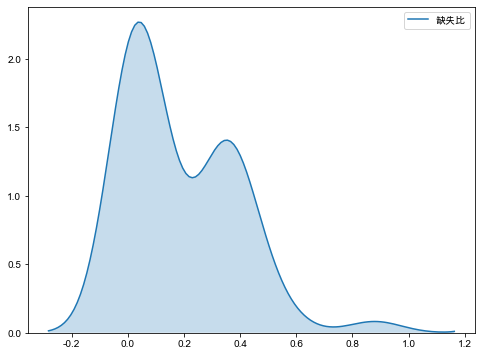

In [122]:
plt.figure(figsize=(8,6))
sns.kdeplot(null_1['缺失比'],shade=True)

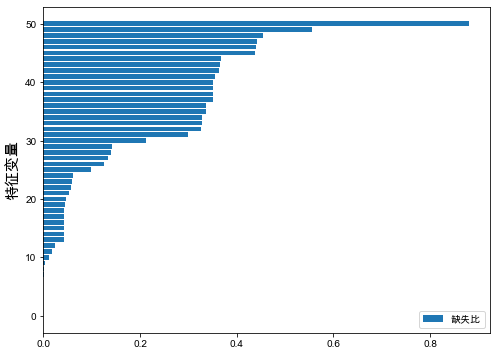

In [123]:
plt.figure(figsize=(8,6))
plt.barh(range(null_1.shape[0]),null_1['缺失比'],label='缺失比')
plt.legend(loc=4)
plt.ylabel('特征变量',fontsize=15);

In [124]:
null_.rename(columns={'index':'特征',0:'缺失比'}).set_index('特征')

,缺失比
特征,
label,0.000000
sid,0.000000
iforderpv_24h,0.000000
h,0.000000
d,0.000000
sampleid,0.000000
arrival,0.000000
hotelcr,0.001155
hoteluv,0.001155


**可视化缺失值**

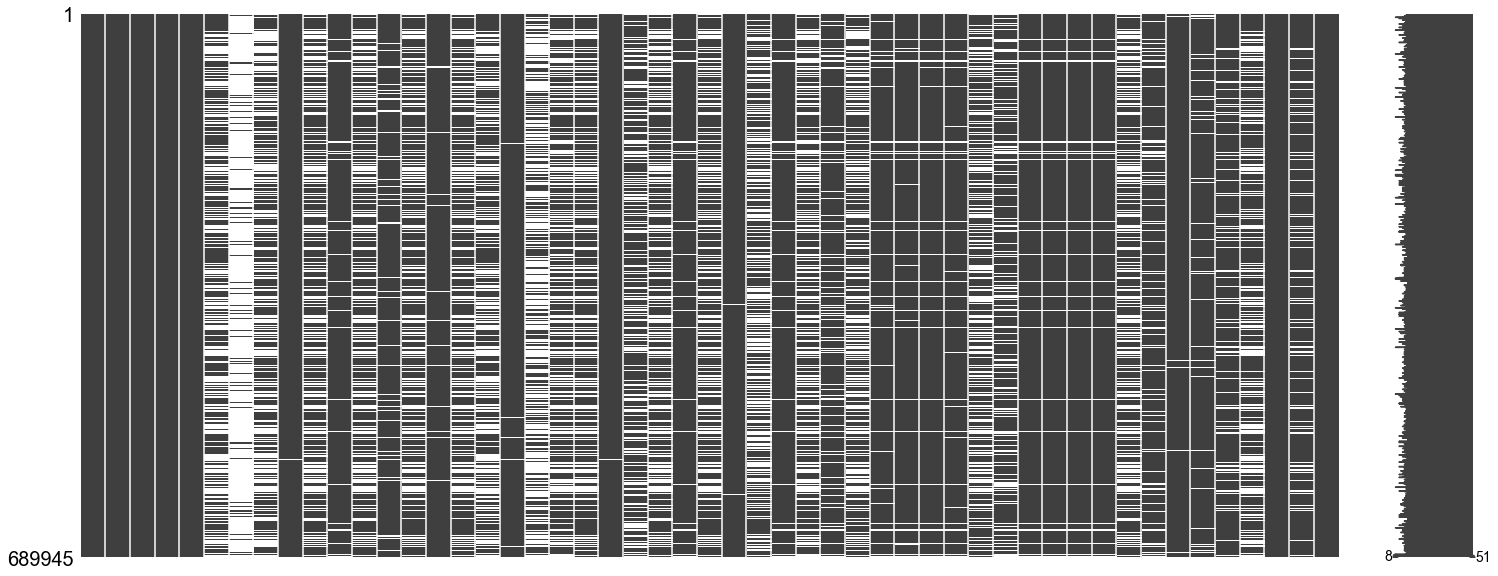

In [125]:
import missingno as msno
msno.matrix(data)

**删除缺失比例为0.879824**

In [161]:
data = data.drop(columns = ['historyvisit_7ordernum'])

### 异常值

In [127]:
data.describe([0.01,0.25,0.5,0.75,0.99],include='all').T

,count,unique,top,freq,mean,std,min,1%,25%,50%,75%,99%,max
label,689945,NaN,NaN,NaN,0.274452,0.446238,0,0,0,0,1,1,1
sampleid,689945,NaN,NaN,NaN,628540,414681,24636,36205.9,312320,599637,887460,2.22689e+06,2.23843e+06
d,689945,7,2016-05-20,111985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival,689945,37,2016-05-20,110982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iforderpv_24h,689945,NaN,NaN,NaN,0.193737,0.395226,0,0,0,0,0,1,1
decisionhabit_user,385450,NaN,NaN,NaN,5.31705,38.5245,0,1,2,3,5,27,3167
historyvisit_totalordernum,386525,NaN,NaN,NaN,11.7105,17.2514,1,1,2,6,14,82,711
hotelcr,689148,NaN,NaN,NaN,1.061,0.0452643,1,1,1.03,1.05,1.09,1.19,3.18
ordercanceledprecent,447831,NaN,NaN,NaN,0.342119,0.35421,0,0,0,0.25,0.57,1,1
landhalfhours,661312,NaN,NaN,NaN,6.08637,12.4132,0,0,0,0,4,48,49


**定义盖帽法处理异常值**

In [128]:
data.loc[:,['lowestprice','lowestprice_pre']].describe([0.01,0.25,0.5,0.75,0.99],include='all').T

,count,mean,std,min,1%,25%,50%,75%,99%,max
lowestprice,687931.0,318.806242,575.782415,-3.0,37.0,116.0,200.0,380.0,1823.0,100000.0
lowestprice_pre,659689.0,315.954583,463.723643,1.0,38.0,118.0,208.0,385.0,1750.0,100000.0


In [162]:
col_01 = ['lowestprice','lowestprice_pre'] # 偏态严重

In [130]:
def block_lower(x):
# x是输⼊入的Series对象,替换1%分位数
    ql = x.quantile(.01)
    out = x.mask(x<ql,ql)
    return(out)

In [163]:
def block_upper(x):
# x是输⼊入的Series对象,l替换99%分位数
    qu = x.quantile(.99)
    out = x.mask(x>qu,qu)
    return(out)

In [164]:
data.loc[:,col_01]=data.loc[:,col_01].apply(block_upper)

In [132]:
data.loc[:,col_01]=data.loc[:,col_01].apply(block_lower)

In [165]:
data.loc[:,['lowestprice','lowestprice_pre']].describe([0.01,0.25,0.5,0.75,0.99],include='all').T

,count,mean,std,min,1%,25%,50%,75%,99%,max
lowestprice,687931.0,304.910234,297.490630,-3.0,37.0,116.0,200.0,380.0,1823.0,1823.0
lowestprice_pre,659689.0,304.318020,287.309392,1.0,38.0,118.0,208.0,385.0,1750.0,1750.0


## 划分测试集和训练集

In [167]:
data_copy = data.copy() # 备份数据

In [168]:
X = data_copy.iloc[:,2:]
y = data_copy.label

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=666)

In [ ]:
# 特征创造

In [171]:
date_train = Xtrain.iloc[:,:2]
date_test = Xtest.iloc[:,:2]

In [172]:
data_test.reset_index(drop=True)

,d,arrival
0,2016-05-20,2016-05-21
1,2016-05-15,2016-05-15
2,2016-05-15,2016-05-15
3,2016-05-20,2016-05-20
4,2016-05-20,2016-06-07
...,...,...
206979,2016-05-16,2016-05-28
206980,2016-05-15,2016-05-15
206981,2016-05-19,2016-06-09
206982,2016-05-19,2016-05-22


In [173]:
date_train.reset_index(drop=True)

,d,arrival
0,2016-05-15,2016-06-08
1,2016-05-19,2016-05-21
2,2016-05-20,2016-05-21
3,2016-05-15,2016-06-08
4,2016-05-20,2016-05-20
...,...,...
453210,2016-05-19,2016-05-29
453211,2016-05-16,2016-05-16
453212,2016-05-15,2016-05-16
453213,2016-05-20,2016-05-20


In [174]:
# date_train.to_csv('date_train.csv')
# date_test.to_csv('date_test.csv') 保持特征创造数据

In [25]:
col_no = ['sid','iforderpv_24h','h'] #没有缺失值的特征
col_clf = ['decisionhabit_user'] # 分类型变量
col_neg = ['delta_price1','delta_price2','customer_value_profit'
           ,'ctrip_profits','deltaprice_pre2_t1'] # 含有负数
col_std = data.columns[data.describe(include='all').T['std'] >100].to_list() # std >100
col_std.remove('delta_price1')
col_std.remove('delta_price2')
col_std.remove('sampleid')
col_std.remove('lasthtlordergap')

In [26]:
col_35 = ['firstorder_bu','decisionhabit_user','historyvisit_totalordernum'
 ,'historyvisit_avghotelnum','customer_value_profit','ctrip_profits','ordernum_oneyear'
 ,'lasthtlordergap','ordercanceledprecent','ordercanncelednum'] # 缺失35% —— 55%

In [28]:
cols = X.columns.to_list()

col_norm = list(set(cols)-set(col_clf + col_std + col_neg + col_no +col_35))

## 缺失值填补

- 分类型变量用 '众数填补' —— col_clf
- 含有负数的特征用 '中值填补' —— col_neg
- std > 100 方差大于100的连续型变量用 '中值填补' —— col_std
- 缺失35%——55%用 '常数 -1 填充' 单独做一类
- 其余变量用 '均值填补' —— col_norm

In [34]:
Xtrain.loc[:,col_clf] = Xtrain.loc[:,col_clf].fillna(Xtrain.loc[:,col_clf].mode())

Xtrain.loc[:,col_neg] = Xtrain.loc[:,col_neg].fillna(Xtrain.loc[:,col_neg].median())

Xtrain.loc[:,col_std] = Xtrain.loc[:,col_std].fillna(Xtrain.loc[:,col_std].median())

Xtrain.loc[:,col_norm] = Xtrain.loc[:,col_norm].fillna(Xtrain.loc[:,col_norm].mean())

Xtrain.loc[:,col_35] = Xtrain.loc[:,col_35].fillna(-1)

In [35]:
Xtest.loc[:,col_clf] = Xtest.loc[:,col_clf].fillna(Xtest.loc[:,col_clf].mode())

In [36]:
Xtest.loc[:,col_neg] = Xtest.loc[:,col_neg].fillna(Xtest.loc[:,col_neg].median())

In [37]:
Xtest.loc[:,col_std] = Xtest.loc[:,col_std].fillna(Xtest.loc[:,col_std].median())

In [38]:
Xtest.loc[:,col_norm] = Xtest.loc[:,col_norm].fillna(Xtest.loc[:,col_norm].mean())

In [40]:
Xtest.loc[:,col_35] = Xtest.loc[:,col_35].fillna(-1)

**检查缺失值填补情况**

In [41]:
Xtrain.isna().any().sum()

0

In [42]:
Xtest.isna().any().sum()

0

In [51]:
# 特征创造
# ordernum_oneyear_train = Xtrain.loc[:,'ordernum_oneyear'].reset_index(drop=True)
# ordernum_oneyear_test = Xtest.loc[:,'ordernum_oneyear'].reset_index(drop=True)
# avgprice_train = Xtrain.loc[:,'avgprice'].reset_index(drop=True)
# avgprice_test = Xtest.loc[:,'avgprice'].reset_index(drop=True)

# M_train = ordernum_oneyear_train * avgprice_train

# M_test = ordernum_oneyear_test * avgprice_test

# M_train.to_csv('M_train.csv')
# M_test.to_csv('M_test.csv')

/Users/jim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  if sys.path[0] == '':


## 特征选择

In [90]:
y.value_counts()

0    500588
1    189357
Name: label, dtype: int64

In [93]:
500588/189357

2.6436202516938905

In [36]:
y.shape

(647450,)

In [37]:
X.shape

(647450, 46)

In [38]:
Xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
iforderpv_24h,453215.0,0.201838,0.401372,0.000,0.000,0.000000,0.000000,1.000
decisionhabit_user,453215.0,2.546994,28.826308,-1.000,-1.000,1.000000,3.000000,2383.000
historyvisit_totalordernum,453215.0,6.202946,14.451892,-1.000,-1.000,1.000000,7.000000,711.000
hotelcr,453215.0,1.061454,0.043997,1.000,1.030,1.050000,1.090000,2.950
ordercanceledprecent,453215.0,-0.125021,0.700082,-1.000,-1.000,0.000000,0.400000,1.000
landhalfhours,453215.0,6.098000,12.426783,0.000,0.000,0.000000,4.000000,49.000
ordercanncelednum,453215.0,101.666377,330.494971,0.000,1.000,2.000000,5.000000,13475.000
commentnums,453215.0,1212.599168,2008.781232,0.000,149.000,530.000000,1507.000000,34189.000
starprefer,453215.0,67.554105,15.730849,0.000,60.000,67.554105,77.100000,100.000
novoters,453215.0,1702.318985,2782.367547,1.000,173.000,714.000000,2172.000000,45455.000


### 方差过滤

In [39]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
Xtrain_var0 = selector.fit(Xtrain).transform(Xtrain)

In [40]:
Xtrain.shape

(453215, 46)

In [41]:
Xtrain_var0.shape

(453215, 46)

### F_检验

In [42]:
from sklearn.feature_selection import f_classif
F , pvalues_f = f_classif(Xtrain,Ytrain)

In [43]:
F

array([5.18088618e+03, 5.12914839e-01, 1.02619051e+04, 6.37370167e+03,
       5.30010765e+03, 2.70217161e+02, 4.34537318e+03, 4.84511347e-01,
       1.16181496e+01, 3.52392149e+00, 2.13195698e+02, 3.07708319e+00,
       4.70206035e+01, 3.78887065e-03, 6.02023694e+02, 2.67662297e+00,
       1.21350512e+03, 6.16452744e+03, 1.15690189e+04, 6.11494229e+03,
       8.27244190e+01, 1.77123331e+03, 8.18078891e+02, 3.95113044e+02,
       9.85716294e+02, 5.25057169e+01, 2.82920103e+03, 9.78747840e+01,
       1.67864913e+02, 4.39022169e+01, 2.19709627e+01, 2.68753256e+03,
       8.89432174e+00, 1.81610831e+03, 1.80269439e+03, 2.26639969e+03,
       2.01498626e+03, 4.00817309e+02, 8.08901019e+03, 4.47914514e+03,
       4.29633150e+03, 4.94223819e+01, 1.45569434e+04, 6.40401277e+01,
       2.16315278e+02, 2.80263803e+03])

In [44]:
pvalues_f

array([0.00000000e+000, 4.73880129e-001, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 1.05972860e-060, 0.00000000e+000, 4.86386294e-001,
       6.53170237e-004, 6.04898094e-002, 2.82921998e-048, 7.94034836e-002,
       7.03336998e-012, 9.50918194e-001, 7.42451145e-133, 1.01832161e-001,
       1.59590431e-265, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       9.46940113e-020, 0.00000000e+000, 9.16150906e-180, 6.95578987e-088,
       3.90800284e-216, 4.29675225e-013, 0.00000000e+000, 4.48102482e-023,
       2.19956440e-038, 3.45581424e-011, 2.76887169e-006, 0.00000000e+000,
       2.86074056e-003, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 3.99644007e-089, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 2.06666985e-012, 0.00000000e+000, 1.22195308e-015,
       5.90820099e-049, 0.00000000e+000])

**与标签没有显著相关性的变量有6个**

In [45]:
(pvalues_f>0.01).sum()

6

**剔除没有相关性的变量**

In [46]:
col_f = list(Xtrain.columns[pvalues_f<0.01])
col_f

['iforderpv_24h',
 'historyvisit_totalordernum',
 'hotelcr',
 'ordercanceledprecent',
 'landhalfhours',
 'ordercanncelednum',
 'starprefer',
 'consuming_capacity',
 'cancelrate',
 'delta_price1',
 'hoteluv',
 'businessrate_pre',
 'ordernum_oneyear',
 'cr_pre',
 'avgprice',
 'lowestprice',
 'firstorder_bu',
 'customereval_pre2',
 'delta_price2',
 'commentnums_pre',
 'customer_value_profit',
 'commentnums_pre2',
 'cancelrate_pre',
 'novoters_pre2',
 'novoters_pre',
 'ctrip_profits',
 'deltaprice_pre2_t1',
 'lowestprice_pre',
 'uv_pre',
 'uv_pre2',
 'lowestprice_pre2',
 'lasthtlordergap',
 'businessrate_pre2',
 'cityuvs',
 'cityorders',
 'lastpvgap',
 'cr',
 'sid',
 'visitnum_oneyear',
 'h']

In [47]:
Xtrain = Xtrain.loc[:,col_f]

In [48]:
Xtest = Xtest.loc[:,col_f]

In [50]:
Xtrain.index = range(Xtrain.shape[0]) # 重置索引
Xtrain

,iforderpv_24h,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,starprefer,consuming_capacity,cancelrate,delta_price1,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0,-1.0,1.01,-1.00,0.0,2.0,67.554105,39.125564,89.0,81.0,...,172.0,-1.0,0.050000,2.267,0.133,0.0,1.139221,27,1050.0,0
1,0,-1.0,1.06,0.19,3.0,63.0,82.400000,72.000000,3978.0,107.0,...,354.0,23823.0,0.550000,25.080,3.353,1753.0,1.139221,257,5780.0,14
2,0,16.0,1.04,0.43,30.0,571.0,96.400000,69.000000,3428.0,37.0,...,395.0,30793.0,0.230000,10.747,1.613,30792.0,1.200000,205,3616.0,11
3,0,1.0,1.01,0.00,0.0,0.0,68.000000,31.000000,321.0,-144.0,...,530.0,355113.0,0.300000,0.913,0.140,806.0,1.000000,184,1064.0,13
4,1,8.0,1.13,0.98,0.0,293.0,56.400000,25.000000,689.0,72.0,...,185.0,161858.0,0.810000,0.107,0.007,19664.0,1.000000,286,1468.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453210,0,-1.0,1.03,0.01,2.0,1.0,30.000000,21.000000,2111.0,-55.0,...,236.0,135349.0,0.120000,1.747,0.107,1182.0,1.139221,128,13213.0,2
453211,0,74.0,1.01,0.55,7.0,2367.0,57.900000,31.000000,11.0,137.0,...,203.0,3243.0,0.650000,11.073,2.147,1509.0,1.380000,727,8826.0,20
453212,1,-1.0,1.08,-1.00,38.0,2.0,67.554105,39.125564,1789.0,81.0,...,306.0,-1.0,0.390000,8.547,1.400,2858.0,1.139221,1,1306.0,20
453213,0,2.0,1.00,0.00,0.0,0.0,40.000000,22.000000,2.0,41.0,...,223.0,120184.0,0.370167,20.513,4.347,27707.0,2.000000,5,1295.0,0


In [ ]:
Ytrain = Ytrain.reset_index(drop=True)

In [49]:
Xtest.index = range(Xtest.shape[0]) # 重置索引
Xtest.head()

,iforderpv_24h,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,starprefer,consuming_capacity,cancelrate,delta_price1,...,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,1,5.0,1.07,0.60,46.0,3.0,40.000000,9.000000,3415.0,-308.0,...,501.0,1116.0,0.50,56.487,12.653,19.0,1.020000,814,6408.0,5
1,0,-1.0,1.08,-1.00,39.0,2.0,67.541185,39.083482,376.0,79.0,...,120.0,-1.0,0.56,2.567,0.280,2862.0,1.138505,2,1292.0,11
2,0,1.0,1.02,0.00,9.0,0.0,40.000000,16.000000,479.0,40.0,...,247.0,198614.0,0.47,21.747,3.133,8856.0,1.000000,73,345.0,23
3,0,2.0,1.11,0.00,0.0,0.0,80.000000,51.000000,378.0,284.0,...,152.0,16440.0,0.54,17.933,4.913,222.0,1.250000,33,325.0,15
4,0,28.0,1.12,0.29,0.0,107.0,88.800000,51.000000,1422.0,588.0,...,222.0,5079.0,0.33,0.213,0.020,1869.0,1.190000,85,9218.0,16


In [ ]:
Ytest = Ytest.reset_index(drop=True)

### 嵌入法筛选特征

In [51]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

In [52]:
# 初步探索
RFC_clf = RFC(n_estimators=10,random_state=0)
X_embedded = SelectFromModel(RFC_clf,threshold=0.05).fit_transform(Xtrain,Ytrain)

/Users/jim/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_base.py:81: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


**利用随机森林调出特征重要性**

In [53]:
importance = RFC_clf.fit(Xtrain,Ytrain).feature_importances_

In [54]:
Xtrain.shape

(453215, 40)

In [55]:
Ytrain.shape

(453215,)

In [58]:
from time import time
import datetime # 计时器

In [ ]:
importance = RFC_clf.fit(Xtrain,Ytrain).feature_importances_
threshold = np.linspace(0,importance.max(),20)
X_embedded = SelectFromModel(RFC_clf,threshold=i).fit_transform(Xtrain,Ytrain)
val = cross_val_score(RFC_clf,X_embedded,Ytrain,cv=5).mean()

**嵌入法画学习曲线**

29:13:599354


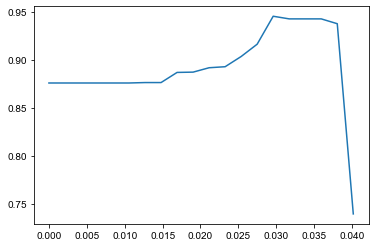

In [59]:
importance = RFC_clf.fit(Xtrain,Ytrain).feature_importances_
threshold = np.linspace(0,importance.max(),20)
score = []
time0 = time()
for i in threshold:
    X_embedded = SelectFromModel(RFC_clf,threshold=i).fit_transform(Xtrain,Ytrain)
    val = cross_val_score(RFC_clf,X_embedded,Ytrain,cv=5).mean()
    score.append(val)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
plt.plot(threshold,score)
plt.show();

In [223]:
np.max(score) #最高分

0.9453085180322806

In [64]:
threshold[np.argmax(score)] #最高分对应的重要性阈值

0.029595611302335584

In [65]:
X_embedded = SelectFromModel(RFC_clf,threshold=0.029595611302335584).fit_transform(Xtrain,Ytrain)

In [78]:
col_k = list(Xtrain.columns[RFC_clf.feature_importances_>0.029595611302335584])

**利用阈值选择出 8 个特征**

In [109]:
col_k_ = ['lasthtlordergap',
 'cityorders',
 'lastpvgap',
 'cr',
 'sid',
 'visitnum_oneyear',
 'h']

In [79]:
col_k

['lasthtlordergap',
 'cityuvs',
 'cityorders',
 'lastpvgap',
 'cr',
 'sid',
 'visitnum_oneyear',
 'h']

In [83]:
Xtrain_new = pd.DataFrame(X_embedded,columns = col_k )
Xtrain_new.head()

,lasthtlordergap,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,-1.0,2.267,0.133,0.0,1.139221,27.0,1050.0,0.0
1,23823.0,25.080,3.353,1753.0,1.139221,257.0,5780.0,14.0
2,30793.0,10.747,1.613,30792.0,1.200000,205.0,3616.0,11.0
3,355113.0,0.913,0.140,806.0,1.000000,184.0,1064.0,13.0
4,161858.0,0.107,0.007,19664.0,1.000000,286.0,1468.0,14.0


In [112]:
Xtest.loc[:,col_k_].reset_index(drop=True).head()

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,1116.0,12.653,19.0,1.020000,814,6408.0,5
1,-1.0,0.280,2862.0,1.138505,2,1292.0,11
2,198614.0,3.133,8856.0,1.000000,73,345.0,23
3,16440.0,4.913,222.0,1.250000,33,325.0,15
4,5079.0,0.020,1869.0,1.190000,85,9218.0,16


**保存清洗后的数据**

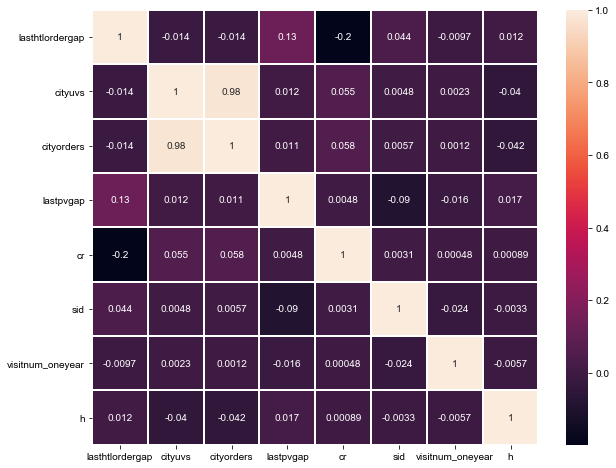

In [113]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(Xtrain_new.corr(),annot=True,linewidths=1)

发现cityorders 与 cityuvs 高度相关

In [ ]:
Xtrain_new.drop(columns='cityuvs',axis=1,inplace=True)
Xtest_new.drop(columns='cityuvs',axis=1,inplace=True)

In [240]:
Xtrain_new.to_csv('Xtrain_new.csv')
Xtest_new.to_csv('Xtest_new.csv')
Ytrain.to_csv('Ytrain.csv')
Ytest.to_csv('Ytest.csv')

/Users/jim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.
